# Resources
- [Spoken Langauge Identification Dataset](https://www.kaggle.com/datasets/toponowicz/spoken-language-identification)
- [Audio Feature Extration](https://thecleverprogrammer.com/2020/07/28/audio-feature-extraction/)
- [How to read and play audio files using python](https://www.youtube.com/watch?v=VBHQIYAt2XU)
- [PySoundFile](https://pypi.org/project/PySoundFile/)
- [Audio Analysis with Neural Networks](https://reference.wolfram.com/language/tutorial/NeuralNetworksAudioAnalysis.html)
- [Machine Learning for audio classification (TensorFlow)](https://www.youtube.com/watch?v=GxBG4wUWf4w)
- [Machine learning on sound and audio data](https://towardsdatascience.com/machine-learning-on-sound-and-audio-data-3ae03bcf5095#:~:text=CNNs%20for%20Machine%20Learning%20on%20sound%20data&text=To%20do%20Machine%20Learning%20on,being%20performant%20on%20image%20data.)

In [110]:
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import pickle as pkl
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import json
import librosa
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tqdm import tqdm

# # make sure ffmpeg is installed as backend.
# !apt install -y ffmpeg

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/Users/josue/Desktop/School/Fall2022/MachineLearning/CS334/FinalProject'):
    for filename in filenames:
        #print(os.path.join(dirname, filename))
        pass

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

2022-12-04 22:39:28.483137: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
song, sr = librosa.load('/Users/josue/Desktop/School/Fall2022/MachineLearning/CS334/FinalProject/SpokenLanguageAudio/Languages/en/en_f_5dff2b7b319207972450f91d569b5a16.fragment1.flac', duration=29)
song

array([-0.20513916, -0.18045044, -0.13726807, ..., -0.04049683,
       -0.0329895 , -0.02993774], dtype=float32)

In [13]:
for i in range(len(mfcc)):
    print(f'mfcc{i}_mean', mfcc[i].mean())
    print(f'mfcc{i}_var', mfcc[i].var())

mfcc0_mean -358.26782
mfcc0_var 10724.987
mfcc1_mean 80.41173
mfcc1_var 3321.4373
mfcc2_mean 4.6486173
mfcc2_var 1001.14435
mfcc3_mean 27.914705
mfcc3_var 916.9654
mfcc4_mean 1.139863
mfcc4_var 534.6274
mfcc5_mean 2.7209053
mfcc5_var 224.52853
mfcc6_mean -19.166283
mfcc6_var 401.20526
mfcc7_mean -7.111193
mfcc7_var 254.16063
mfcc8_mean -17.754494
mfcc8_var 239.41743
mfcc9_mean 0.0558859
mfcc9_var 248.98627
mfcc10_mean -8.190784
mfcc10_var 160.61281
mfcc11_mean -4.991223
mfcc11_var 103.54585
mfcc12_mean -17.571215
mfcc12_var 146.82814
mfcc13_mean 5.476569
mfcc13_var 96.05496
mfcc14_mean -4.320021
mfcc14_var 80.292206
mfcc15_mean 1.1545432
mfcc15_var 74.283356
mfcc16_mean -8.95121
mfcc16_var 87.294624
mfcc17_mean 1.1445259
mfcc17_var 47.555813
mfcc18_mean -7.7648363
mfcc18_var 64.69145
mfcc19_mean 0.9869073
mfcc19_var 59.618614


In [14]:
# Dataset location
SOURCE_PATH = '/Users/josue/Desktop/School/Fall2022/MachineLearning/CS334/FinalProject/SpokenLanguageAudio/Languages'

# Sampling rate.
sr = 22050

# Let's make sure all files have the same amount of samples and pick a duration right under 3 seconds.
TOTAL_SAMPLES = 10 * sr

# X amount of slices => X times more training examples.
NUM_SLICES = 1
SAMPLES_PER_SLICE = int(TOTAL_SAMPLES / NUM_SLICES)

In [15]:
columns = list(pd.read_csv('/Users/josue/Desktop/School/Fall2022/MachineLearning/CS334/FinalProject/Data/features_3_sec.csv').columns)

In [32]:
SpokenLanguageFeatures = pd.DataFrame(columns=columns)
SpokenLanguageFeatures

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label


In [39]:
for i, (dirpath, dirnames, filenames) in enumerate(os.walk(SOURCE_PATH)):
    print(i)
    label = dirpath[-2:]
    for file in tqdm(filenames):
        if file == '.DS_Store':
                continue
        if 'speed' not in file and 'pitch' not in file and 'noise' not in file:
            song, sr = librosa.load(os.path.join(dirpath, file), duration=10)
            for s in range(NUM_SLICES):
                start_sample = SAMPLES_PER_SLICE * s
                end_sample = start_sample + SAMPLES_PER_SLICE
                chroma_stft = librosa.feature.chroma_stft(y=song, sr=sr)
                rms = librosa.feature.rms(y=song)
                spectral_centroid = librosa.feature.spectral_centroid(y=song, sr=sr)
                spectral_bandwidth = librosa.feature.spectral_bandwidth(y=song, sr=sr)
                rolloff = librosa.feature.spectral_rolloff(y=song, sr=sr)
                zero_crossing_rate = librosa.feature.zero_crossing_rate(y=song)
                harmony = librosa.effects.harmonic(y=song)
                perceptr = librosa.perceptual_weighting(S=song, frequencies=sr)
                tempo = librosa.beat.tempo(y=song, sr=sr)
                mfcc = librosa.feature.mfcc(y=song[start_sample:end_sample], sr=sr, n_mfcc=20)
                newRow = []
                newRow.append(file)
                newRow.append(len(song))
                newRow.append(chroma_stft.mean())
                newRow.append(chroma_stft.var())
                newRow.append(rms.mean())
                newRow.append(rms.var())
                newRow.append(spectral_centroid.mean())
                newRow.append(spectral_centroid.var())
                newRow.append(spectral_bandwidth.mean())
                newRow.append(spectral_bandwidth.var())
                newRow.append(rolloff.mean())
                newRow.append(rolloff.var())
                newRow.append(zero_crossing_rate.mean())
                newRow.append(zero_crossing_rate.var())
                newRow.append(harmony.mean())
                newRow.append(harmony.var())
                newRow.append(perceptr.mean())
                newRow.append(perceptr.var())
                newRow.append(tempo)
                for i in range(len(mfcc)):
                    newRow.append(mfcc[i].mean())
                    newRow.append(mfcc[i].var())
                newRow.append(label)
                SpokenLanguageFeatures.loc[len(SpokenLanguageFeatures)] = newRow

0


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 5289.16it/s]


1


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24540/24540 [08:55<00:00, 45.79it/s]


2


 35%|█████████████████████████████████████████████████████████████████████████▍                                                                                                                                          | 8500/24540 [03:15<03:58, 67.29it/s]/Users/josue/opt/anaconda3/envs/CS334/lib/python3.10/site-packages/librosa/util/decorators.py:88: UserWarning: Trying to estimate tuning from empty frequency set.
  return f(*args, **kwargs)
 35%|██████████████████████████████████████████████████████████████████████████                                                                                                                                          | 8573/24540 [03:16<04:08, 64.29it/s]/Users/josue/opt/anaconda3/envs/CS334/lib/python3.10/site-packages/librosa/util/decorators.py:88: UserWarning: Trying to estimate tuning from empty frequency set.
  return f(*args, **kwargs)
 66%|█████████████████████████████████████████████████████████████████████████████████████████████████████████

3


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24540/24540 [09:04<00:00, 45.10it/s]


In [40]:
SpokenLanguageFeatures

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,de_m_4d099776261f2267d3148a7e7e766d14.fragment...,220500,0.459284,0.083237,0.030814,0.001059,2784.141298,2.275598e+06,2714.275990,294996.882979,...,58.017918,-5.080758,81.612122,0.319076,44.886909,-0.455594,45.811893,0.473224,38.234352,de
1,de_f_404792fda5c66b95903adafd5a5f5d10.fragment...,220500,0.350609,0.123592,0.052624,0.002389,1132.729345,2.929529e+05,1760.009399,235735.684271,...,42.695290,-6.186783,60.151169,-0.019713,31.420767,1.822451,28.481518,-0.918448,44.480663,de
2,de_f_1996a0f045b3301946a9194dfad545ab.fragment...,220500,0.363580,0.108315,0.027268,0.000650,2403.363228,2.294411e+06,2118.676578,442233.852580,...,122.412567,-0.321965,64.194328,1.291107,55.251793,-6.669063,61.394741,-1.595127,58.766834,de
3,de_m_fc6bd6bb9d66a89bb8d8a8a7efa23e6b.fragment...,220500,0.427678,0.107185,0.027529,0.000646,1544.173349,1.073857e+06,1894.207774,490716.537427,...,81.928131,-9.539305,123.851448,-0.291622,64.735039,-5.042536,57.683491,-1.657782,90.962112,de
4,de_f_26ddc4e756f61233d74d42cc000c9dae.fragment...,220500,0.390985,0.105881,0.045774,0.001560,1642.121259,2.050664e+06,1987.682271,470439.373556,...,69.486656,3.298883,57.778286,6.681451,27.649090,0.832455,38.761028,3.144302,38.858692,de
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3072,en_m_6876763e37d7a41d6f53f4322a72b0d2.fragment...,220500,0.328350,0.098656,0.090944,0.005229,1906.882218,1.808746e+06,1751.590641,270701.388682,...,48.244778,-3.913946,97.434647,3.219433,67.282501,-0.089797,61.735661,-4.547686,60.872597,en
3073,en_f_67a0cba10d171b24039a79faa1d4d603.fragment...,220500,0.380870,0.113417,0.024636,0.000713,2658.655778,3.382423e+06,2364.812431,538438.361040,...,117.028847,-3.775191,65.402077,-0.706430,62.185715,-7.599319,76.371475,3.386238,50.409489,en
3074,en_f_cb90542ae2fd3247d519634c2f9e53a8.fragment...,220500,0.313321,0.111192,0.027460,0.000680,2110.479341,1.404313e+06,2212.101284,225270.849941,...,72.751556,0.052481,64.041885,10.915161,74.296402,-6.496957,89.407753,1.450275,116.038879,en
3075,en_f_10134f409d9b7b0b95fed6e025febcad.fragment...,220500,0.344296,0.113952,0.039954,0.000901,1976.363957,2.049384e+06,1987.968886,484370.359178,...,74.595787,-8.168712,68.245567,-0.448824,47.946671,-8.492841,66.775627,0.965507,43.312958,en


In [79]:
SpokenLanguageFeatures.to_csv('SpokenLanguageFeatures.csv', index=False)

In [222]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

**IMPORTING LIBRARIES**

In [223]:
import warnings
warnings.simplefilter("ignore", UserWarning)

!pip install xgboost -U
!pip install librosa -U
!pip install hyperopt

import os
from tqdm import tqdm
import pickle
import scipy
import sys
import pandas as pd
import numpy as np
import IPython
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
import librosa #Python package for music & audio files
import librosa.display
import librosa.display as lplt

from tensorflow import keras
from keras.models import Sequential
from IPython.display import Audio
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import normalize
from sklearn.feature_selection import RFECV,mutual_info_regression
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.decomposition import PCA
from xgboost import XGBClassifier
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe


**LOADING & PREPROCESSING THE DATA**

In [224]:
#Reading the csv file
final_data = pd.read_csv("SpokenLanguageFeatures.csv", index_col=False)

In [225]:
final_data.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,rolloff_var,zero_crossing_rate_mean,zero_crossing_rate_var,harmony_mean,harmony_var,perceptr_mean,perceptr_var,tempo,mfcc1_mean,mfcc1_var,mfcc2_mean,mfcc2_var,mfcc3_mean,mfcc3_var,mfcc4_mean,mfcc4_var,mfcc5_mean,mfcc5_var,mfcc6_mean,mfcc6_var,mfcc7_mean,mfcc7_var,mfcc8_mean,mfcc8_var,mfcc9_mean,mfcc9_var,mfcc10_mean,mfcc10_var,mfcc11_mean,mfcc11_var,mfcc12_mean,mfcc12_var,mfcc13_mean,mfcc13_var,mfcc14_mean,mfcc14_var,mfcc15_mean,mfcc15_var,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,de_m_4d099776261f2267d3148a7e7e766d14.fragment...,220500,0.459284,0.083237,0.030814,0.001059,2784.141298,2.275598e+06,2714.275990,294996.882979,5731.928836,6.443161e+06,0.131291,0.018053,7.761381e-06,0.000445,-62.888047,948.808704,[143.5546875],-355.89682,21465.365,76.170555,3605.5828,28.681953,482.0640,23.095844,317.18134,13.403187,373.68286,8.415444,216.08710,3.052342,146.46231,-0.004921,149.15959,-2.216921,115.02817,3.485120,120.194910,-3.741988,167.52274,6.043718,59.836120,-0.474709,91.270020,-4.505262,111.983444,-0.673726,69.791420,6.978789,58.017918,-5.080758,81.612120,0.319076,44.886910,-0.455594,45.811893,0.473224,38.234352,de
1,de_f_404792fda5c66b95903adafd5a5f5d10.fragment...,220500,0.350609,0.123592,0.052624,0.002389,1132.729345,2.929529e+05,1760.009399,235735.684271,2086.397515,1.780317e+06,0.028392,0.000535,8.226496e-06,0.001404,-60.252625,1064.792666,[123.046875],-349.00964,10213.739,123.309746,1528.7769,12.756027,1276.1355,32.047320,573.09130,21.595427,370.13480,5.652278,241.08829,0.990311,234.87363,13.444667,152.18901,15.789648,106.74564,6.795877,122.861824,-6.421318,82.52276,1.799348,63.133907,2.788764,57.954185,0.413094,37.401062,5.226742,32.190243,3.955133,42.695290,-6.186783,60.151170,-0.019713,31.420767,1.822450,28.481518,-0.918448,44.480663,de
2,de_f_1996a0f045b3301946a9194dfad545ab.fragment...,220500,0.363580,0.108315,0.027268,0.000650,2403.363228,2.294411e+06,2118.676578,442233.852580,4481.379321,6.358094e+06,0.151203,0.019972,1.791290e-06,0.000359,-64.149648,980.369742,[135.99917763],-388.30148,12511.186,85.204580,3158.3137,4.739606,1704.6626,25.673700,429.77072,-11.909439,345.97128,-11.112377,323.02972,-17.900957,247.14684,-4.600009,196.03070,-2.920834,189.25820,-4.172706,108.615340,-12.522345,106.52451,10.263613,93.534370,-8.937926,111.838020,3.331518,55.111603,-3.904185,54.783066,-5.681792,122.412570,-0.321965,64.194330,1.291107,55.251793,-6.669063,61.394740,-1.595127,58.766834,de
3,de_m_fc6bd6bb9d66a89bb8d8a8a7efa23e6b.fragment...,220500,0.427678,0.107185,0.027529,0.000646,1544.173349,1.073857e+06,1894.207774,490716.537427,3231.404358,5.568833e+06,0.056220,0.004263,-1.630501e-06,0.000824,-62.667756,1041.712645,[172.265625],-455.58606,15358.696,101.588110,2885.6262,16.250652,735.5921,51.805430,1295.90450,24.954800,529.29944,13.391850,262.51584,4.232023,240.66937,11.307216,224.01650,4.122509,185.66278,2.137244,143.089360,-0.067473,282.99628,2.379368,113.541280,3.693931,71.667250,-5.400682,136.832210,-6.335216,85.276535,2.697737,81.928130,-9.539305,123.851450,-0.291622,64.735040,-5.042536,57.683490,-1.657782,90.962110,de
4,de_f_26ddc4e756f61233d74d42cc000c9dae.fragment...,220500,0.390985,0.105881,0.045774,0.001560,1642.121259,2.050664e+06,1987.682271,470439.373556,3075.176223,5.726688e+06,0.058793,0.008244,-2.195294e-07,0.001582,-59.546212,1119.065442,[135.99917763],-338.14175,9520.336,119.130005,3336.4836,15.947071,788.7476,9.125519,432.71670,11.012895,231.38055,8.479659,199.70062,1.073501,154.81550,4.661321,114.10384,0.576951,183.76706,6.727059,144.440320,-0.321824,99.23262,4.599712,70.983650,0.554454,112.134315,3.825768,95.496580,10.213902,32.069870,3.492660,69.486660,3.298883,57.778286,6.681451,27.649090,0.832455,38.761030,3.144302,38.858692,de


In [226]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3077 entries, 0 to 3076
Data columns (total 60 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   filename                 3077 non-null   object 
 1   length                   3077 non-null   int64  
 2   chroma_stft_mean         3077 non-null   float64
 3   chroma_stft_var          3077 non-null   float64
 4   rms_mean                 3077 non-null   float64
 5   rms_var                  3077 non-null   float64
 6   spectral_centroid_mean   3077 non-null   float64
 7   spectral_centroid_var    3077 non-null   float64
 8   spectral_bandwidth_mean  3077 non-null   float64
 9   spectral_bandwidth_var   3077 non-null   float64
 10  rolloff_mean             3077 non-null   float64
 11  rolloff_var              3077 non-null   float64
 12  zero_crossing_rate_mean  3077 non-null   float64
 13  zero_crossing_rate_var   3077 non-null   float64
 14  harmony_mean            

In [227]:
final_data.shape

(3077, 60)

In [228]:
final_data.dtypes

filename                    object
length                       int64
chroma_stft_mean           float64
chroma_stft_var            float64
rms_mean                   float64
rms_var                    float64
spectral_centroid_mean     float64
spectral_centroid_var      float64
spectral_bandwidth_mean    float64
spectral_bandwidth_var     float64
rolloff_mean               float64
rolloff_var                float64
zero_crossing_rate_mean    float64
zero_crossing_rate_var     float64
harmony_mean               float64
harmony_var                float64
perceptr_mean              float64
perceptr_var               float64
tempo                       object
mfcc1_mean                 float64
mfcc1_var                  float64
mfcc2_mean                 float64
mfcc2_var                  float64
mfcc3_mean                 float64
mfcc3_var                  float64
mfcc4_mean                 float64
mfcc4_var                  float64
mfcc5_mean                 float64
mfcc5_var           

In [229]:
final_data = final_data.drop(labels='filename',axis=1)

In [230]:
#audio file
audio = "/Users/josue/Desktop/School/Fall2022/MachineLearning/CS334/FinalProject/SpokenLanguageAudio/Languages/de/de_f_5d2e7f30d69f2d1d86fd05f3bbe120c2.fragment1.flac"
#Load & decode the audio as a time series, where sr represents the sampling rate
data , sr = librosa.load(audio)
print(type(data), type(sr))

<class 'numpy.ndarray'> <class 'int'>


In [231]:
librosa.load(audio, sr=45600)

(array([ 0.0152182 , -0.00151955, -0.01577934, ...,  0.00072447,
         0.00074157,  0.00057989], dtype=float32),
 45600)

In [232]:
#Playing the audio within the notebook
IPython.display.Audio(data, rate=sr)

**AUDIO VISUALIZATION**

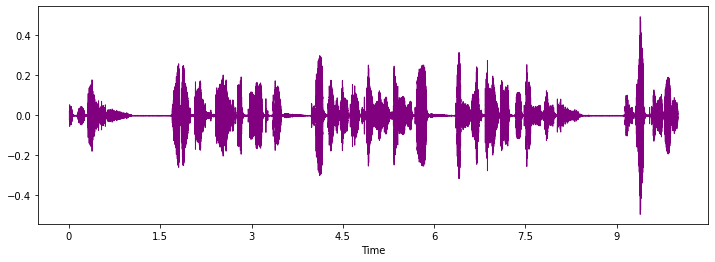

In [233]:
#Plotting the raw wave file to quickly scan the audio data & contrast which languages might be more similar.

plt.figure(figsize=(12,4))
librosa.display.waveshow(data, color = "Purple")
plt.show()

# Harmony

Extract harmonic elements from an audio time-series.

In [341]:
harmony = librosa.effects.harmonic(y=song)
harmony

array([-0.06158955, -0.06832048, -0.06931436, ...,  0.04044874,
        0.05047789,  0.057726  ], dtype=float32)

# RMS
Compute root-mean-square (RMS) value for each frame, either from the audio samples y

In [335]:
rms = librosa.feature.rms(y=song)
rms

array([[5.82818016e-02, 5.89946769e-02, 6.04233146e-02, 3.78400199e-02,
        2.49854438e-02, 3.66328545e-02, 5.33053353e-02, 6.89774752e-02,
        7.98582733e-02, 8.48067850e-02, 8.48552361e-02, 8.21088180e-02,
        8.05667937e-02, 7.44195655e-02, 6.40556589e-02, 5.74884675e-02,
        5.07815480e-02, 5.41980304e-02, 5.85160367e-02, 5.51295094e-02,
        4.94202673e-02, 3.97213586e-02, 2.96717845e-02, 1.97846461e-02,
        1.44301597e-02, 1.08955186e-02, 1.64051168e-02, 2.02326030e-02,
        2.39806511e-02, 2.61979550e-02, 2.53862664e-02, 2.41689663e-02,
        2.05664933e-02, 1.56803690e-02, 1.02500180e-02, 4.60003642e-03,
        1.59440527e-03, 7.13060203e-04, 6.24132692e-04, 6.69546600e-04,
        7.06158986e-04, 7.11563451e-04, 7.48702092e-04, 7.19771779e-04,
        7.55990390e-04, 7.85297365e-04, 8.34752980e-04, 2.59985076e-03,
        8.36411305e-03, 1.67781636e-02, 2.90737711e-02, 3.51302586e-02,
        4.62323800e-02, 6.87520951e-02, 8.00203159e-02, 8.510509

# Spectrogram
The STFT represents a signal in the time-frequency domain by computing discrete Fourier transforms (DFT) over short overlapping windows.

The Fourier Transform takes a time-based pattern, measures every possible cycle, and returns the overall "cycle recipe" (the amplitude, offset, & rotation speed for every cycle that was found).

Using a spectrogram we represent the noise or sound intensity of audio data with respect to frequency and time. On the premise of those frequency values we assign a color range, with lower values as a brighter color and high frequency values as a darker color. A spectrogram may be a sort of heatmap.

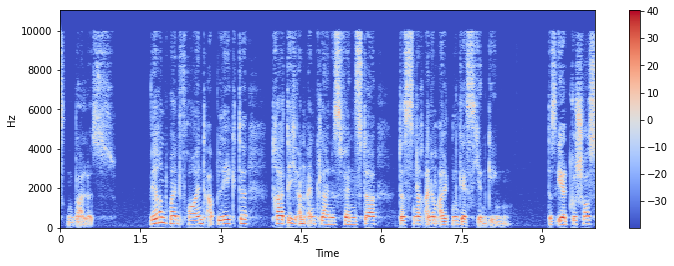

In [311]:
stft = librosa.stft(data)
stft_db = librosa.amplitude_to_db(abs(stft))
plt.figure(figsize=(12,4))
librosa.display.specshow(stft_db, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

# Spectral Centroid
During any sound emission we may see our complete sound/audio data focused on a particular point or mean. This is called the centroid of the wave. In other words, the center mass of audio data.

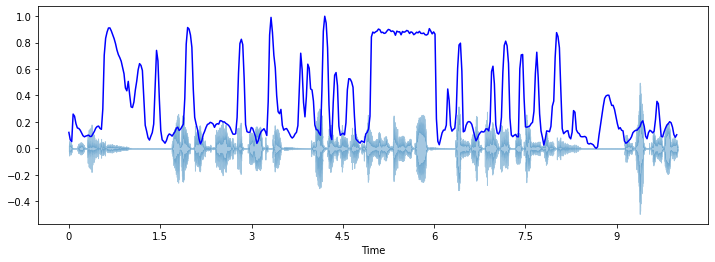

In [331]:
import sklearn
def normalize(x, axis = 0):
    return sklearn.preprocessing.minmax_scale(x, axis = axis)
spectral_centroids = librosa.feature.spectral_centroid(y=song, sr=sr)[0]
plt.figure(figsize= (12,4))
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)
librosa.display.waveshow(data, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_centroids), color='b')

# Spectral Rolloff

In this method we try to analyze the waveform in which our frequency drops suddenly from high to 0. In the language of calculus we can say that there is a non-differentiability point in our waveform.

The roll-off frequency is defined for each frame as the center frequency for a spectrogram bin such that at least roll_percent (0.85 by default) of the energy of the spectrum in this frame is contained in this bin and the bins below. This can be used to, e.g., approximate the maximum (or minimum) frequency by setting roll_percent to a value close to 1 (or 0).

/var/folders/3n/344lt8m52hgg43g5j4q6rtwh0000gp/T/ipykernel_68146/1474135414.py:5: FutureWarning: Pass y=[ 0.02663208 -0.00715088  0.01863647 ...  0.01540161  0.01170898
  0.01082397] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spectral_rolloff = librosa.feature.spectral_rolloff(data+0.01, sr=sr)[0]


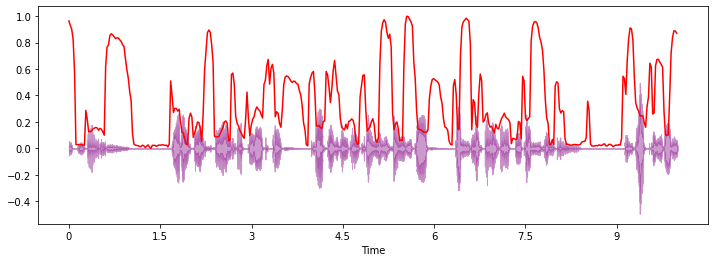

In [325]:
import sklearn
def normalize(x, axis = 0):
    return sklearn.preprocessing.minmax_scale(x, axis = axis)
#computing the rolloff frequency for each frame in a signal
spectral_rolloff = librosa.feature.spectral_rolloff(data+0.01, sr=sr)[0]
plt.figure(figsize=(12,4))
librosa.display.waveshow(data, sr = sr, alpha = 0.4, color='Purple')
frames = range(len(spectral_rolloff))
t = librosa.frames_to_time(frames)
plt.plot(t, normalize(spectral_rolloff), color = 'r')

# Chroma
Chroma feature or chromagram closely relates to the twelve different pitch classes.
Chroma features capture harmonic & melodic characteristics of music while being robust to changes.

/var/folders/3n/344lt8m52hgg43g5j4q6rtwh0000gp/T/ipykernel_68146/4262399838.py:3: FutureWarning: Pass y=[ 0.01663208 -0.01715088  0.00863647 ...  0.00540161  0.00170898
  0.00082397] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  chroma = librosa.feature.chroma_stft(data, sr=sr)


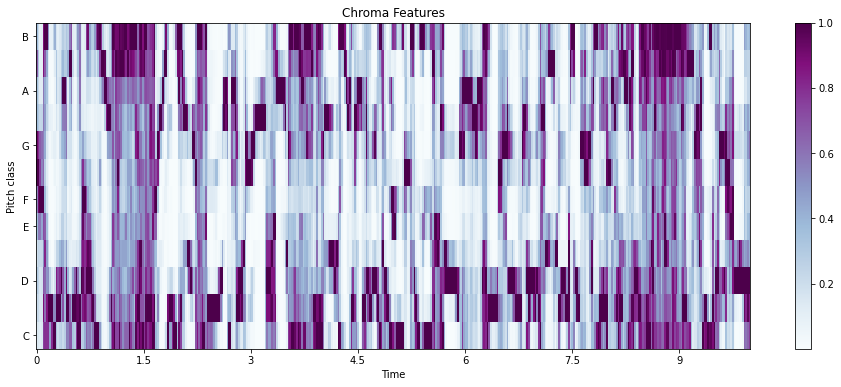

In [237]:
chroma = librosa.feature.chroma_stft(data, sr=sr)
plt.figure(figsize=(16,6))
lplt.specshow(chroma, sr=sr, x_axis='time', y_axis='chroma', cmap='BuPu')
plt.colorbar()
plt.title("Chroma Features")
plt.show()

# Spectral Bandwidth
Bandwidth is defined as the change or difference in two frequencies, like high and low frequencies.

/var/folders/3n/344lt8m52hgg43g5j4q6rtwh0000gp/T/ipykernel_68146/2437640335.py:1: FutureWarning: Pass y=[ 0.02663208 -0.00715088  0.01863647 ...  0.01540161  0.01170898
  0.01082397] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spectral_bandwidth_2 = librosa.feature.spectral_bandwidth(data + 0.01, sr = sr)[0]
/var/folders/3n/344lt8m52hgg43g5j4q6rtwh0000gp/T/ipykernel_68146/2437640335.py:2: FutureWarning: Pass y=[ 0.02663208 -0.00715088  0.01863647 ...  0.01540161  0.01170898
  0.01082397] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spectral_bandwidth_3 = librosa.feature.spectral_bandwidth(data + 0.01, sr = sr, p = 3)[0]
/var/folders/3n/344lt8m52hgg43g5j4q6rtwh0000gp/T/ipykernel_68146/2437640335.py:3: FutureWarning: Pass y=[ 0.02663208 -0.00715088  0.01863647 ...  0.01540161  0.01170898
  0.01082397] as keyword args. From version 0.10 passing these as positional arguments will re

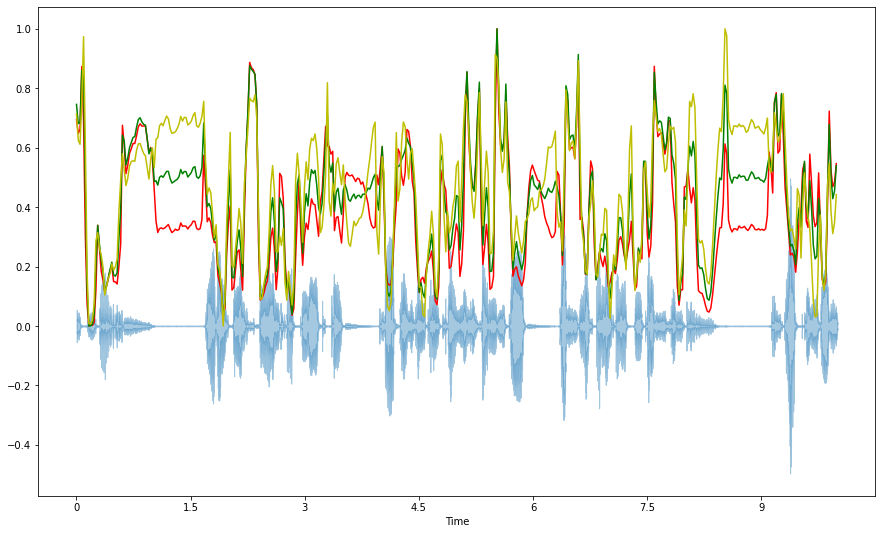

In [333]:
spectral_bandwidth_2 = librosa.feature.spectral_bandwidth(data + 0.01, sr = sr)[0]
spectral_bandwidth_3 = librosa.feature.spectral_bandwidth(data + 0.01, sr = sr, p = 3)[0]
spectral_bandwidth_4 = librosa.feature.spectral_bandwidth(data + 0.01, sr = sr, p = 4)[0]
plt.figure(figsize = (15, 9))
librosa.display.waveshow(data, sr = sr, alpha = 0.4)
plt.plot(t, normalize(spectral_bandwidth_2), color = 'r')
plt.plot(t, normalize(spectral_bandwidth_3), color = 'g')
plt.plot(t, normalize(spectral_bandwidth_4), color = 'y')

# Melspectrogram

Compute a mel-scaled spectrogram.

If a spectrogram input S is provided, then it is mapped directly onto the mel basis by mel_f.dot(S).

If a time-series input y, sr is provided, then its magnitude spectrogram S is first computed, and then mapped onto the mel scale by mel_f.dot(S**power).

/var/folders/3n/344lt8m52hgg43g5j4q6rtwh0000gp/T/ipykernel_68146/2395590258.py:1: FutureWarning: Pass y=[ 0.01663208 -0.01715088  0.00863647 ...  0.00540161  0.00170898
  0.00082397] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspectrogram = librosa.feature.melspectrogram(data, sr=sr)


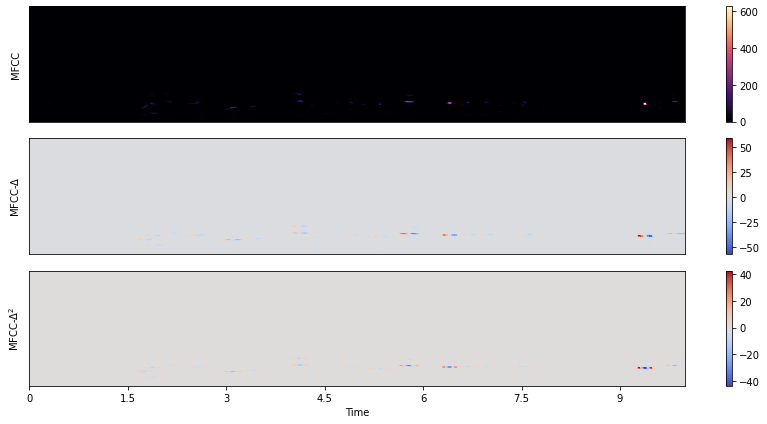

In [345]:
melspectrogram = librosa.feature.melspectrogram(data, sr=sr)
melspectrogram

# Padding first and second deltas
delta_mfcc  = librosa.feature.delta(melspectrogram)
delta2_mfcc = librosa.feature.delta(melspectrogram, order=2)

# We'll show each in its own subplot
plt.figure(figsize=(12, 6))

plt.subplot(3,1,1)
librosa.display.specshow(melspectrogram)
plt.ylabel('MFCC')
plt.colorbar()

plt.subplot(3,1,2)
librosa.display.specshow(delta_mfcc)
plt.ylabel('MFCC-$\Delta$')
plt.colorbar()

plt.subplot(3,1,3)
librosa.display.specshow(delta2_mfcc, sr=sr, x_axis='time')
plt.ylabel('MFCC-$\Delta^2$')
plt.colorbar()

plt.tight_layout()

# Stacking these 3 tables together into one matrix
M = np.vstack([mfcc, delta_mfcc, delta2_mfcc])

# Perceptual Weighting
Perceptual weighting of a power spectrogram:

In [347]:
perceptr = librosa.perceptual_weighting(S=song, frequencies=sr)
perceptr

array([[-94.16155534, -94.16155534, -94.16155534, ..., -28.54933458,
        -25.81987005, -23.38948923]])

# MFCC
In sound processing, the mel-frequency cepstrum (MFC) is a representation of the short-term power spectrum of a sound, based on a linear cosine transform of a log power spectrum on a nonlinear mel scale of frequency.

Mel-frequency cepstral coefficients (MFCCs) are coefficients that collectively make up an MFC.[1] They are derived from a type of cepstral representation of the audio clip (a nonlinear "spectrum-of-a-spectrum"). The difference between the cepstrum and the mel-frequency cepstrum is that in the MFC, the frequency bands are equally spaced on the mel scale, which approximates the human auditory system's response more closely than the linearly-spaced frequency bands used in the normal spectrum. This frequency warping can allow for better representation of sound, for example, in audio compression that might potentially reduce the transmission bandwidth and the storage requirements of audio signals.

/var/folders/3n/344lt8m52hgg43g5j4q6rtwh0000gp/T/ipykernel_68146/1415191255.py:2: FutureWarning: Pass y=[ 0.01663208 -0.01715088  0.00863647 ...  0.00540161  0.00170898
  0.00082397] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(data, n_mfcc=20)


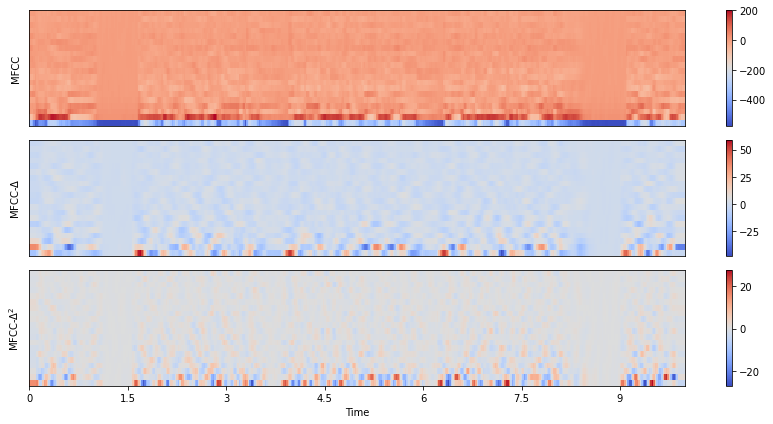

In [338]:
# Next, we'll extract the first 20 Mel-frequency cepstral coefficients (MFCCs)
mfcc = librosa.feature.mfcc(data, n_mfcc=20)

# Padding first and second deltas
delta_mfcc  = librosa.feature.delta(mfcc)
delta2_mfcc = librosa.feature.delta(mfcc, order=2)

# We'll show each in its own subplot
plt.figure(figsize=(12, 6))

plt.subplot(3,1,1)
librosa.display.specshow(mfcc)
plt.ylabel('MFCC')
plt.colorbar()

plt.subplot(3,1,2)
librosa.display.specshow(delta_mfcc)
plt.ylabel('MFCC-$\Delta$')
plt.colorbar()

plt.subplot(3,1,3)
librosa.display.specshow(delta2_mfcc, sr=sr, x_axis='time')
plt.ylabel('MFCC-$\Delta^2$')
plt.colorbar()

plt.tight_layout()

# Stacking these 3 tables together into one matrix
M = np.vstack([mfcc, delta_mfcc, delta2_mfcc])

# Zero Crossing Rate
The rate at which zero-crossings occur is a simple measure of the frequency content of a signal.
Zero crossing is said to occur if successive samples have different algebric signs.

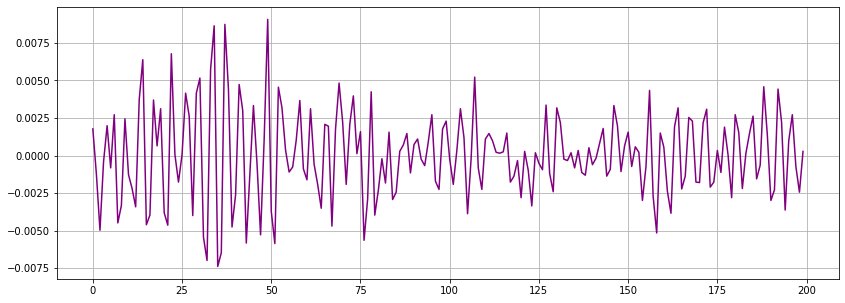

In [238]:
start = 1000
end = 1200
plt.figure(figsize=(14,5))
plt.plot(data[start:end], color='Purple')
plt.grid()

In [239]:
zero_cross_rate = librosa.zero_crossings(data[start:end], pad=False)
print("The number of zero crossings is:",sum(zero_cross_rate))

The number of zero crossings is: 104


**EXTRACTING AND SCALING THE FEATURES**

In [240]:
#To convert categorical data into model-understandable numerica data
class_list = final_data.iloc[:, -1]
convertor = LabelEncoder()

In [241]:
#Fitting the label encoder & return encoded labels
y = convertor.fit_transform(class_list)

In [242]:
y

array([0, 0, 0, ..., 1, 1, 1])

In [244]:
final_data.iloc[:, :-1]

,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,rolloff_var,zero_crossing_rate_mean,zero_crossing_rate_var,harmony_mean,harmony_var,perceptr_mean,perceptr_var,tempo,mfcc1_mean,mfcc1_var,mfcc2_mean,mfcc2_var,mfcc3_mean,mfcc3_var,mfcc4_mean,mfcc4_var,mfcc5_mean,mfcc5_var,mfcc6_mean,mfcc6_var,mfcc7_mean,mfcc7_var,mfcc8_mean,mfcc8_var,mfcc9_mean,mfcc9_var,mfcc10_mean,mfcc10_var,mfcc11_mean,mfcc11_var,mfcc12_mean,mfcc12_var,mfcc13_mean,mfcc13_var,mfcc14_mean,mfcc14_var,mfcc15_mean,mfcc15_var,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var
0,220500,0.459284,0.083237,0.030814,0.001059,2784.141298,2.275598e+06,2714.275990,294996.882979,5731.928836,6.443161e+06,0.131291,0.018053,7.761381e-06,0.000445,-62.888047,948.808704,[143.5546875],-355.89682,21465.365,76.170555,3605.5828,28.681953,482.0640,23.095844,317.18134,13.403187,373.68286,8.415444,216.08710,3.052342,146.46231,-0.004921,149.15959,-2.216921,115.02817,3.485120,120.194910,-3.741988,167.52274,6.043718,59.836120,-0.474709,91.270020,-4.505262,111.983444,-0.673726,69.791420,6.978789,58.017918,-5.080758,81.612120,0.319076,44.886910,-0.455594,45.811893,0.473224,38.234352
1,220500,0.350609,0.123592,0.052624,0.002389,1132.729345,2.929529e+05,1760.009399,235735.684271,2086.397515,1.780317e+06,0.028392,0.000535,8.226496e-06,0.001404,-60.252625,1064.792666,[123.046875],-349.00964,10213.739,123.309746,1528.7769,12.756027,1276.1355,32.047320,573.09130,21.595427,370.13480,5.652278,241.08829,0.990311,234.87363,13.444667,152.18901,15.789648,106.74564,6.795877,122.861824,-6.421318,82.52276,1.799348,63.133907,2.788764,57.954185,0.413094,37.401062,5.226742,32.190243,3.955133,42.695290,-6.186783,60.151170,-0.019713,31.420767,1.822450,28.481518,-0.918448,44.480663
2,220500,0.363580,0.108315,0.027268,0.000650,2403.363228,2.294411e+06,2118.676578,442233.852580,4481.379321,6.358094e+06,0.151203,0.019972,1.791290e-06,0.000359,-64.149648,980.369742,[135.99917763],-388.30148,12511.186,85.204580,3158.3137,4.739606,1704.6626,25.673700,429.77072,-11.909439,345.97128,-11.112377,323.02972,-17.900957,247.14684,-4.600009,196.03070,-2.920834,189.25820,-4.172706,108.615340,-12.522345,106.52451,10.263613,93.534370,-8.937926,111.838020,3.331518,55.111603,-3.904185,54.783066,-5.681792,122.412570,-0.321965,64.194330,1.291107,55.251793,-6.669063,61.394740,-1.595127,58.766834
3,220500,0.427678,0.107185,0.027529,0.000646,1544.173349,1.073857e+06,1894.207774,490716.537427,3231.404358,5.568833e+06,0.056220,0.004263,-1.630501e-06,0.000824,-62.667756,1041.712645,[172.265625],-455.58606,15358.696,101.588110,2885.6262,16.250652,735.5921,51.805430,1295.90450,24.954800,529.29944,13.391850,262.51584,4.232023,240.66937,11.307216,224.01650,4.122509,185.66278,2.137244,143.089360,-0.067473,282.99628,2.379368,113.541280,3.693931,71.667250,-5.400682,136.832210,-6.335216,85.276535,2.697737,81.928130,-9.539305,123.851450,-0.291622,64.735040,-5.042536,57.683490,-1.657782,90.962110
4,220500,0.390985,0.105881,0.045774,0.001560,1642.121259,2.050664e+06,1987.682271,470439.373556,3075.176223,5.726688e+06,0.058793,0.008244,-2.195294e-07,0.001582,-59.546212,1119.065442,[135.99917763],-338.14175,9520.336,119.130005,3336.4836,15.947071,788.7476,9.125519,432.71670,11.012895,231.38055,8.479659,199.70062,1.073501,154.81550,4.661321,114.10384,0.576951,183.76706,6.727059,144.440320,-0.321824,99.23262,4.599712,70.983650,0.554454,112.134315,3.825768,95.496580,10.213902,32.069870,3.492660,69.486660,3.298883,57.778286,6.681451,27.649090,0.832455,38.761030,3.144302,38.858692
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3072,220500,0.328350,0.098656,0.090944,0.005229,1906.882218,1.808746e+06

In [245]:
final_data = final_data.drop(columns='tempo')

In [246]:
#Standard scaler is used to standardize features & look like standard normally distributed data
fit = StandardScaler()
X = fit.fit_transform(np.array(final_data.iloc[:, :-1], dtype = float))

**SPLIT THE DATA INTO TRAINING DATA & TEST DATA**

In [247]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [248]:
len(y_train)

2061

In [249]:
len(y_test)

1016

In sparse categorical cross-entropy , truth labels are integer encoded, for example, [1] , [2] and [3] for 3-class problem

In [250]:
#The loss is calculated using sparse_categorical_crossentropy function
def trainModel(model, epochs, optimizer):
    batch_size = 128
    model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                   metrics='accuracy'
    )
    return model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, 
                     batch_size=batch_size)

In [251]:
#Plotting the curves
def plotValidate(history):
    print("Validation Accuracy",max(history.history["val_accuracy"]))
    pd.DataFrame(history.history).plot(figsize=(12,6))
    plt.show()
    

<AxesSubplot:>

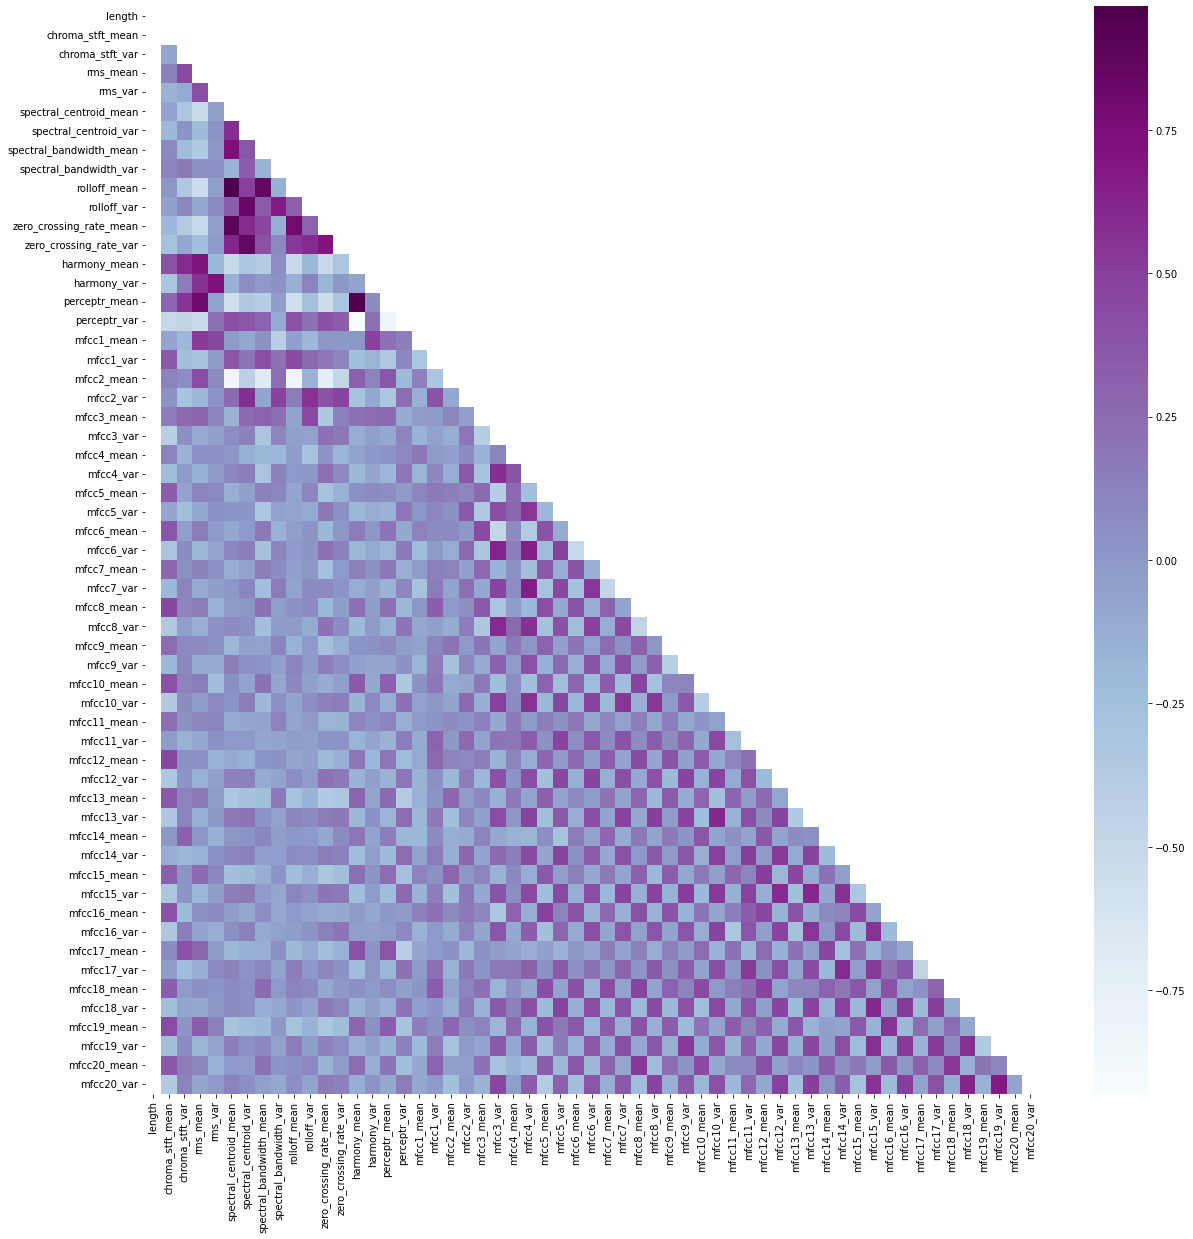

In [252]:
#correlation
corr = final_data.corr()
#Creation of a mask for the heatmap
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
plt.subplots(figsize=(20, 20))
sns.heatmap(corr, mask=mask, cmap="BuPu")

**XGBOOST**

* XGBoost (eXtreme Gradient Boosting) is a popular supervised-learning algorithm used for regression and classification on large datasets. It uses sequentially-built shallow decision trees to provide accurate results and a highly-scalable training method that avoids overfitting.

* XGBClassifier is a scikit-learn API compatible class for classification.

In [253]:
model = XGBClassifier(n_estimators=1000)
model.fit(X_train,y_train,eval_metric='merror')

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=1000,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', ...)

In [254]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)
target_names = sorted(set(y))

print(f'Training accuracy: {accuracy_score(y_train,y_pred_train)}')
print(f'Training:\n {classification_report(y_train, y_pred_train, labels=target_names)}')
print(f'Testing accuracy: {accuracy_score(y_test,y_pred_test)}')
print(f'Testing:\n {classification_report(y_test, y_pred_test, labels=target_names)}')

Training accuracy: 1.0
Training:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       702
           1       1.00      1.00      1.00       684
           2       1.00      1.00      1.00       675

    accuracy                           1.00      2061
   macro avg       1.00      1.00      1.00      2061
weighted avg       1.00      1.00      1.00      2061

Testing accuracy: 0.9891732283464567
Testing:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       335
           1       0.99      0.98      0.99       336
           2       0.99      0.99      0.99       345

    accuracy                           0.99      1016
   macro avg       0.99      0.99      0.99      1016
weighted avg       0.99      0.99      0.99      1016



<AxesSubplot:>

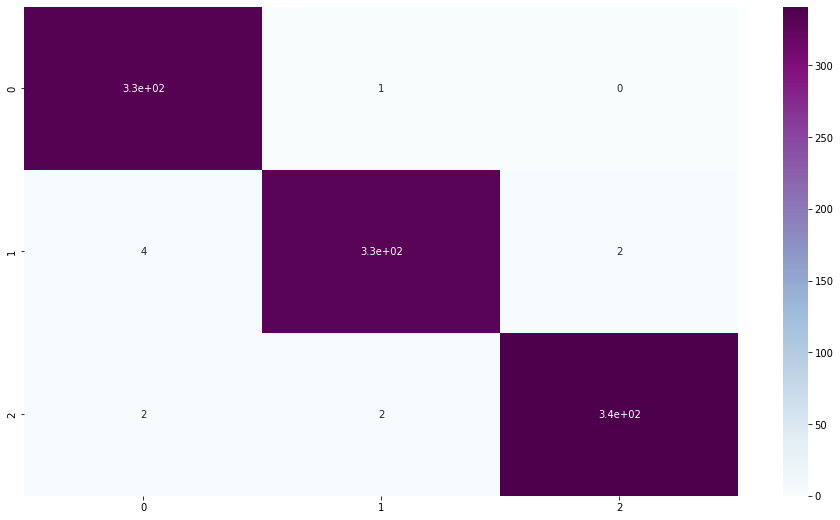

In [255]:
#Confusion matrix
conf_mat = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize = (16, 9))
sns.heatmap(conf_mat,cmap="BuPu", annot=True, xticklabels = target_names, yticklabels = target_names )

**Deep Neural Network (DNN)**

In [256]:
#Here, we use Adam optimizer to train the model
#All of the hidden layers are using RELU activation function
#Output Layer uses softmax function


model = keras.models.Sequential([
    keras.layers.Dense(512, activation="relu", input_shape=(X_train.shape[1],)),
    keras.layers.Dropout(0.2),
    
    keras.layers.Dense(256,activation="relu"),
    keras.layers.Dropout(0.2),
    
    keras.layers.Dense(128,activation="relu"),
    keras.layers.Dropout(0.2),
    
    keras.layers.Dense(64,activation="relu"),
    keras.layers.Dropout(0.2),
    
    keras.layers.Dense(3, activation="softmax"),
    
])
print(model.summary())
model_history = trainModel(model=model, epochs=100, optimizer='adam')

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_80 (Dense)            (None, 512)               29696     
                                                                 
 dropout_64 (Dropout)        (None, 512)               0         
                                                                 
 dense_81 (Dense)            (None, 256)               131328    
                                                                 
 dropout_65 (Dropout)        (None, 256)               0         
                                                                 
 dense_82 (Dense)            (None, 128)               32896     
                                                                 
 dropout_66 (Dropout)        (None, 128)               0         
                                                                 
 dense_83 (Dense)            (None, 64)              

17/17 [==============================] - 0s 5ms/step - loss: 0.0028 - accuracy: 0.9990 - val_loss: 0.0199 - val_accuracy: 0.9961
Epoch 48/100
17/17 [==============================] - 0s 5ms/step - loss: 0.0027 - accuracy: 0.9995 - val_loss: 0.0256 - val_accuracy: 0.9931
Epoch 49/100
17/17 [==============================] - 0s 5ms/step - loss: 0.0048 - accuracy: 0.9985 - val_loss: 0.0230 - val_accuracy: 0.9951
Epoch 50/100
17/17 [==============================] - 0s 5ms/step - loss: 0.0051 - accuracy: 0.9990 - val_loss: 0.0253 - val_accuracy: 0.9941
Epoch 51/100
17/17 [==============================] - 0s 6ms/step - loss: 0.0043 - accuracy: 0.9976 - val_loss: 0.0160 - val_accuracy: 0.9961
Epoch 52/100
17/17 [==============================] - 0s 6ms/step - loss: 0.0015 - accuracy: 0.9995 - val_loss: 0.0180 - val_accuracy: 0.9941
Epoch 53/100
17/17 [==============================] - 0s 5ms/step - loss: 0.0029 - accuracy: 0.9990 - val_loss: 0.0273 - val_accuracy: 0.9941
Epoch 54/100
17/17 

In [257]:
model.predict(X_test)

32/32 [==============================] - 0s 1ms/step


array([[2.23245422e-07, 9.62488457e-07, 9.99998808e-01],
       [1.00000000e+00, 1.11575625e-13, 2.47219983e-17],
       [1.00000000e+00, 1.27973784e-10, 2.87225994e-12],
       ...,
       [1.66180636e-09, 1.33132980e-08, 1.00000000e+00],
       [4.19134259e-12, 1.00000000e+00, 1.27676749e-11],
       [1.60038860e-09, 1.67549830e-09, 1.00000000e+00]], dtype=float32)

In [258]:
y_test

array([2, 0, 0, ..., 2, 1, 2])

In [259]:
test_loss, test_accuracy = model.evaluate(X_test, y_test, batch_size=128)
print("The test loss is :",test_loss)
print("\nThe test Accuracy is :",test_accuracy*100)

8/8 [==============================] - 0s 2ms/step - loss: 0.0396 - accuracy: 0.9872
The test loss is : 0.03959879279136658

The test Accuracy is : 98.72047305107117


Validation Accuracy 0.998031497001648


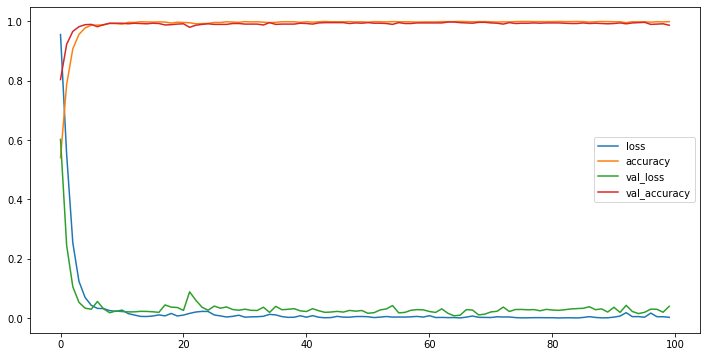

In [260]:
#Plot the loss & accuracy curves for training & validation
plotValidate(model_history)

In [273]:
#Here, we use Adam optimizer to train the model
#All of the hidden layers are using RELU activation function
#Output Layer uses softmax function


model = keras.models.Sequential([
    keras.layers.Dense(32, activation="relu", input_shape=(X_train.shape[1],)),
    keras.layers.Dropout(0.2),
    
    keras.layers.Dense(3, activation="softmax"),
    
])
print(model.summary())
model_history = trainModel(model=model, epochs=100, optimizer='adam')

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_91 (Dense)            (None, 32)                1856      
                                                                 
 dropout_71 (Dropout)        (None, 32)                0         
                                                                 
 dense_92 (Dense)            (None, 3)                 99        
                                                                 
Total params: 1,955
Trainable params: 1,955
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/100
17/17 [==============================] - 1s 10ms/step - loss: 1.3049 - accuracy: 0.3455 - val_loss: 1.0697 - val_accuracy: 0.4213
Epoch 2/100
17/17 [==============================] - 0s 3ms/step - loss: 1.0871 - accuracy: 0.4483 - val_loss: 0.9346 - val_accuracy: 0.5561
Epoch 3/100
17/17 [========

Epoch 53/100
17/17 [==============================] - 0s 2ms/step - loss: 0.1513 - accuracy: 0.9554 - val_loss: 0.1119 - val_accuracy: 0.9774
Epoch 54/100
17/17 [==============================] - 0s 2ms/step - loss: 0.1609 - accuracy: 0.9520 - val_loss: 0.1104 - val_accuracy: 0.9744
Epoch 55/100
17/17 [==============================] - 0s 2ms/step - loss: 0.1442 - accuracy: 0.9607 - val_loss: 0.1074 - val_accuracy: 0.9774
Epoch 56/100
17/17 [==============================] - 0s 2ms/step - loss: 0.1385 - accuracy: 0.9583 - val_loss: 0.1061 - val_accuracy: 0.9783
Epoch 57/100
17/17 [==============================] - 0s 2ms/step - loss: 0.1353 - accuracy: 0.9622 - val_loss: 0.1042 - val_accuracy: 0.9774
Epoch 58/100
17/17 [==============================] - 0s 2ms/step - loss: 0.1354 - accuracy: 0.9622 - val_loss: 0.1026 - val_accuracy: 0.9793
Epoch 59/100
17/17 [==============================] - 0s 2ms/step - loss: 0.1277 - accuracy: 0.9680 - val_loss: 0.1005 - val_accuracy: 0.9803
Epoch 

In [274]:
model.predict(X_test)

32/32 [==============================] - 0s 607us/step


array([[9.7670150e-04, 5.8309305e-03, 9.9319237e-01],
       [9.5670635e-01, 2.1022913e-04, 4.3083400e-02],
       [9.9534708e-01, 7.0036319e-04, 3.9524660e-03],
       ...,
       [2.4159013e-05, 3.7009763e-03, 9.9627483e-01],
       [2.7875114e-07, 9.9999583e-01, 3.9523488e-06],
       [2.5289491e-04, 2.1428051e-03, 9.9760431e-01]], dtype=float32)

In [275]:
y_test

array([2, 0, 0, ..., 2, 1, 2])

In [276]:
test_loss, test_accuracy = model.evaluate(X_test, y_test, batch_size=128)
print("The test loss is :",test_loss)
print("\nThe test Accuracy is :",test_accuracy*100)

8/8 [==============================] - 0s 1ms/step - loss: 0.0649 - accuracy: 0.9833
The test loss is : 0.06487244367599487

The test Accuracy is : 98.32677245140076


Validation Accuracy 0.9832677245140076


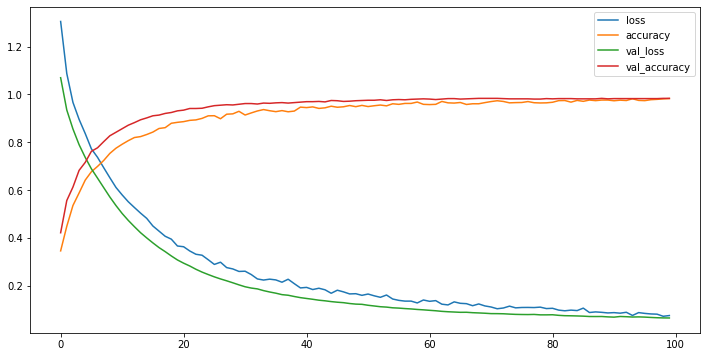

In [277]:
#Plot the loss & accuracy curves for training & validation
plotValidate(model_history)

In [278]:
#Here, we use Adam optimizer to train the model
#All of the hidden layers are using RELU activation function
#Output Layer uses softmax function


model = keras.models.Sequential([
    keras.layers.Dense(8, activation="relu", input_shape=(X_train.shape[1],)),
    keras.layers.Dropout(0.2),
    
    keras.layers.Dense(8, activation="relu", input_shape=(X_train.shape[1],)),
    keras.layers.Dropout(0.2),
    
    keras.layers.Dense(3, activation="softmax"),
    
])
print(model.summary())
model_history = trainModel(model=model, epochs=100, optimizer='adam')

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_93 (Dense)            (None, 8)                 464       
                                                                 
 dropout_72 (Dropout)        (None, 8)                 0         
                                                                 
 dense_94 (Dense)            (None, 8)                 72        
                                                                 
 dropout_73 (Dropout)        (None, 8)                 0         
                                                                 
 dense_95 (Dense)            (None, 3)                 27        
                                                                 
Total params: 563
Trainable params: 563
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/100
17/17 [==============================]

17/17 [==============================] - 0s 2ms/step - loss: 0.5846 - accuracy: 0.7623 - val_loss: 0.4437 - val_accuracy: 0.8642
Epoch 52/100
17/17 [==============================] - 0s 2ms/step - loss: 0.5872 - accuracy: 0.7589 - val_loss: 0.4404 - val_accuracy: 0.8642
Epoch 53/100
17/17 [==============================] - 0s 2ms/step - loss: 0.5848 - accuracy: 0.7540 - val_loss: 0.4364 - val_accuracy: 0.8661
Epoch 54/100
17/17 [==============================] - 0s 2ms/step - loss: 0.5861 - accuracy: 0.7530 - val_loss: 0.4333 - val_accuracy: 0.8661
Epoch 55/100
17/17 [==============================] - 0s 2ms/step - loss: 0.5807 - accuracy: 0.7618 - val_loss: 0.4280 - val_accuracy: 0.8711
Epoch 56/100
17/17 [==============================] - 0s 2ms/step - loss: 0.5765 - accuracy: 0.7598 - val_loss: 0.4211 - val_accuracy: 0.8720
Epoch 57/100
17/17 [==============================] - 0s 2ms/step - loss: 0.5502 - accuracy: 0.7836 - val_loss: 0.4165 - val_accuracy: 0.8770
Epoch 58/100
17/17 

In [279]:
model.predict(X_test)

32/32 [==============================] - 0s 627us/step


array([[2.39633117e-03, 2.57029068e-02, 9.71900821e-01],
       [5.94354033e-01, 3.69431014e-04, 4.05276597e-01],
       [9.68813777e-01, 9.73132532e-03, 2.14548539e-02],
       ...,
       [2.28313766e-02, 1.38776690e-01, 8.38391900e-01],
       [2.47871241e-04, 9.39341187e-01, 6.04109131e-02],
       [1.17153764e-01, 3.40737075e-01, 5.42109132e-01]], dtype=float32)

In [280]:
y_test

array([2, 0, 0, ..., 2, 1, 2])

In [281]:
test_loss, test_accuracy = model.evaluate(X_test, y_test, batch_size=128)
print("The test loss is :",test_loss)
print("\nThe test Accuracy is :",test_accuracy*100)

8/8 [==============================] - 0s 975us/step - loss: 0.2668 - accuracy: 0.9291
The test loss is : 0.26679447293281555

The test Accuracy is : 92.91338324546814


Validation Accuracy 0.9320865869522095


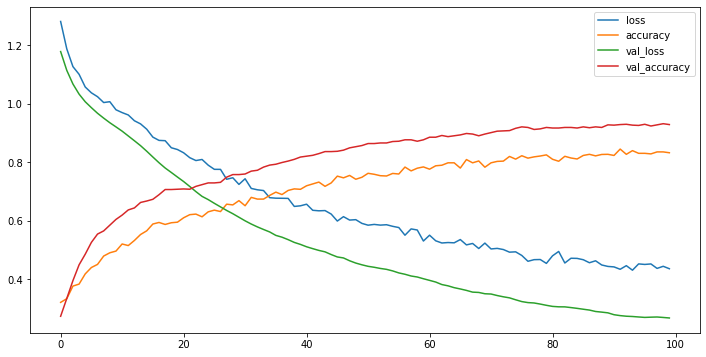

In [282]:
#Plot the loss & accuracy curves for training & validation
plotValidate(model_history)

In [298]:
#Here, we use Adam optimizer to train the model
#All of the hidden layers are using RELU activation function
#Output Layer uses softmax function


model = keras.models.Sequential([
    keras.layers.Dense(16, activation="relu", input_shape=(X_train.shape[1],)),
    keras.layers.Dropout(0.2),
    
    keras.layers.Dense(8, activation="relu", input_shape=(X_train.shape[1],)),
    keras.layers.Dropout(0.2),
    
    keras.layers.Dense(8, activation="relu", input_shape=(X_train.shape[1],)),
    keras.layers.Dropout(0.2),
    
    keras.layers.Dense(4, activation="relu", input_shape=(X_train.shape[1],)),
    keras.layers.Dropout(0.2),
    
    keras.layers.Dense(3, activation="softmax"),
    
])
print(model.summary())
model_history = trainModel(model=model, epochs=100, optimizer='adam')

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_109 (Dense)           (None, 16)                928       
                                                                 
 dropout_84 (Dropout)        (None, 16)                0         
                                                                 
 dense_110 (Dense)           (None, 8)                 136       
                                                                 
 dropout_85 (Dropout)        (None, 8)                 0         
                                                                 
 dense_111 (Dense)           (None, 8)                 72        
                                                                 
 dropout_86 (Dropout)        (None, 8)                 0         
                                                                 
 dense_112 (Dense)           (None, 4)               

17/17 [==============================] - 0s 3ms/step - loss: 0.5913 - accuracy: 0.7608 - val_loss: 0.3809 - val_accuracy: 0.9035
Epoch 48/100
17/17 [==============================] - 0s 2ms/step - loss: 0.6153 - accuracy: 0.7530 - val_loss: 0.3756 - val_accuracy: 0.8976
Epoch 49/100
17/17 [==============================] - 0s 2ms/step - loss: 0.5947 - accuracy: 0.7623 - val_loss: 0.3686 - val_accuracy: 0.9075
Epoch 50/100
17/17 [==============================] - 0s 2ms/step - loss: 0.5851 - accuracy: 0.7623 - val_loss: 0.3629 - val_accuracy: 0.9114
Epoch 51/100
17/17 [==============================] - 0s 2ms/step - loss: 0.5908 - accuracy: 0.7627 - val_loss: 0.3583 - val_accuracy: 0.9104
Epoch 52/100
17/17 [==============================] - 0s 2ms/step - loss: 0.5839 - accuracy: 0.7627 - val_loss: 0.3485 - val_accuracy: 0.9114
Epoch 53/100
17/17 [==============================] - 0s 2ms/step - loss: 0.5664 - accuracy: 0.7758 - val_loss: 0.3452 - val_accuracy: 0.9154
Epoch 54/100
17/17 

In [299]:
model.predict(X_test)

32/32 [==============================] - 0s 712us/step


array([[8.1832724e-05, 7.1688659e-02, 9.2822951e-01],
       [9.2252982e-01, 1.1773202e-02, 6.5697044e-02],
       [9.5527589e-01, 2.6909327e-03, 4.2033199e-02],
       ...,
       [1.8764280e-05, 5.5020742e-02, 9.4496047e-01],
       [3.6765631e-02, 8.9459831e-01, 6.8636023e-02],
       [3.7919800e-03, 3.4554395e-01, 6.5066415e-01]], dtype=float32)

In [300]:
y_test

array([2, 0, 0, ..., 2, 1, 2])

In [301]:
test_loss, test_accuracy = model.evaluate(X_test, y_test, batch_size=128)
print("The test loss is :",test_loss)
print("\nThe test Accuracy is :",test_accuracy*100)

8/8 [==============================] - 0s 991us/step - loss: 0.1926 - accuracy: 0.9606
The test loss is : 0.19255796074867249

The test Accuracy is : 96.0629940032959


Validation Accuracy 0.960629940032959


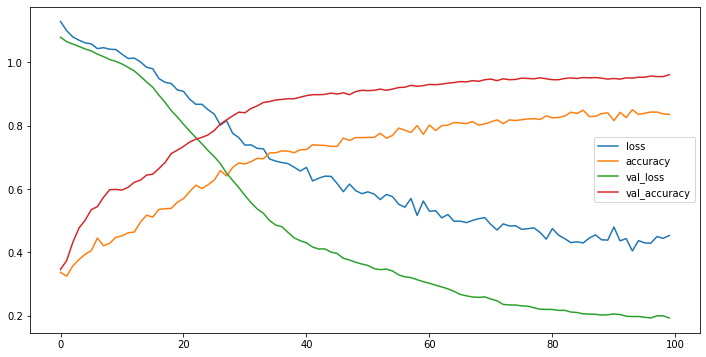

In [302]:
#Plot the loss & accuracy curves for training & validation
plotValidate(model_history)

# CNN


The objective of this project is to classify 10 sec audio files by language using TensorFlow and Librosa. To classify these audio samples in .wav format, we will preprocess them by calculating their MFCC, which is a temporal representation of the energy variations for each perceived frequency band. In this case, we are choosing 13 bands. For improved modularity and clarity, we will create a dictionnary of MFCCs and associated labels in a separate json file.

In [377]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import json
import librosa
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tqdm import tqdm

# # make sure ffmpeg is installed as backend.
# !apt install -y ffmpeg

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/Users/josue/Desktop/School/Fall2022/MachineLearning/CS334/FinalProject'):
    for filename in filenames:
        #print(os.path.join(dirname, filename))
        pass

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [378]:
# Dataset location
SOURCE_PATH = '/Users/josue/Desktop/School/Fall2022/MachineLearning/CS334/FinalProject/SpokenLanguageAudio/Languages/'

# Path to labels and processed data file, json format.
JSON_PATH = '/Users/josue/Desktop/School/Fall2022/MachineLearning/CS334/FinalProject/languageData.json'

# Sampling rate.
sr = 22050

# Let's make sure all files have the same amount of samples and pick a duration right under 10 seconds.
TOTAL_SAMPLES = 10 * sr

# X amount of slices => X times more training examples.
NUM_SLICES = 1
SAMPLES_PER_SLICE = int(TOTAL_SAMPLES / NUM_SLICES)

In [379]:
def preprocess_data(source_path, json_path):

    # Let's create a dictionary of labels and processed data.
    mydict = {
        "labels": [],
        "mfcc": []
        }

    # Let's browse each file, slice it and generate the 13 band mfcc for each slice.
    for i, (dirpath, dirnames, filenames) in enumerate(os.walk(source_path)):
        print(i)
        for file in tqdm(filenames):
            if file == '.DS_Store':
                continue
            # exclude a corrupted wav file that makes everything crash.
            if os.path.join(dirpath, file) != '/Users/josue/Desktop/School/Fall2022/MachineLearning/CS334/FinalProject/Data/genres_original/jazz/jazz.00054.wav':
                song, sr = librosa.load(os.path.join(dirpath, file), duration=10)
                for s in range(NUM_SLICES):
                    start_sample = SAMPLES_PER_SLICE * s
                    end_sample = start_sample + SAMPLES_PER_SLICE
                    mfcc = librosa.feature.mfcc(y=song[start_sample:end_sample], sr=sr, n_mfcc=13)
                    mfcc = mfcc.T
                    mydict["labels"].append(i-1)
                    mydict["mfcc"].append(mfcc.tolist())
            else:
                pass

    # Let's write the dictionary in a json file.    
    with open(json_path, 'w') as f:
        json.dump(mydict, f)
    f.close()

In [380]:
def load_data(json_path):

    with open(json_path, 'r') as f:
        data = json.load(f)
    f.close()

    # Let's load our data into numpy arrays for TensorFlow compatibility.
    X = np.array(data["mfcc"])
    y = np.array(data["labels"])

    return X, y

In [381]:
def prepare_datasets(inputs, targets, split_size):
    
    # Creating a validation set and a test set.
    inputs_train, inputs_val, targets_train, targets_val = train_test_split(inputs, targets, test_size=split_size)
    inputs_train, inputs_test, targets_train, targets_test = train_test_split(inputs_train, targets_train, test_size=split_size)
    
    # Our CNN model expects 3D input shape.
    inputs_train = inputs_train[..., np.newaxis]
    inputs_val = inputs_val[..., np.newaxis]
    inputs_test = inputs_test[..., np.newaxis]
    
    return inputs_train, inputs_val, inputs_test, targets_train, targets_val, targets_test

In [382]:
def design_model(input_shape):

    # Let's design the model architecture.
    model = tf.keras.models.Sequential([
        
        tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=input_shape),
        tf.keras.layers.MaxPooling2D((3,3), strides=(2,2), padding='same'),
        tf.keras.layers.BatchNormalization(),
        
        tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D((3,3), strides=(2,2), padding='same'),
        tf.keras.layers.BatchNormalization(),
        
        tf.keras.layers.Conv2D(32, (2,2), activation='relu'),
        tf.keras.layers.MaxPooling2D((3,3), strides=(2,2), padding='same'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.3),
        
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(64, activation='relu'), 
        tf.keras.layers.Dense(len(np.unique(targets)), activation='softmax')
    ])

    return model

In [383]:
def make_prediction(model, X, y, idx):
    
    language_dict = {
        0 : "de",
        1 : "en",
        2 : "es",
        }
        
    predictions = model.predict(X)
    language = np.argmax(predictions[idx])
    
    print("\n---Now testing the model for one audio file---\nThe model predicts: {}, and ground truth is: {}.\n".format(language_dict[language], language_dict[y[idx]]))


In [384]:
def plot_performance(hist):
    
    acc = hist.history['acc']
    val_acc = hist.history['val_acc']
    loss = hist.history['loss']
    val_loss = hist.history['val_loss']

    epochs = range(len(acc))

    plt.plot(epochs, acc, 'r', label='Training accuracy')
    plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.figure()

    plt.plot(epochs, loss, 'r', label='Training Loss')
    plt.plot(epochs, val_loss, 'b', label='Validation Loss')
    plt.title('Training and validation loss')
    plt.legend()

    plt.show()

preprocessing data
0


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 681.67it/s]


1


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24540/24540 [08:45<00:00, 46.66it/s]


2


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24540/24540 [08:08<00:00, 50.26it/s]


3


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24540/24540 [08:06<00:00, 50.42it/s]


preprocessing done
data loaded
dataset prepared


model designed
modle compiled
Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 429, 11, 32)       320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 215, 6, 32)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 215, 6, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 213, 4, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 107, 2, 32)       0         
 2D)                                                             
                       

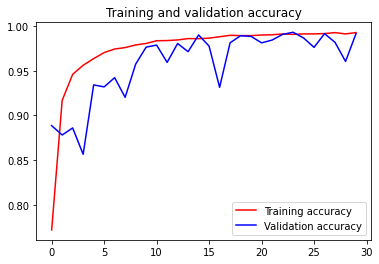

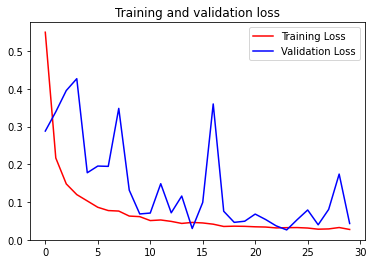

performance given
369/369 [==============================] - 6s 16ms/step

---Now testing the model for one audio file---
The model predicts: en, and ground truth is: en.



In [385]:
print('preprocessing data')
preprocess_data(source_path=SOURCE_PATH, json_path=JSON_PATH)
print('preprocessing done')
inputs, targets = load_data(json_path=JSON_PATH)
print('data loaded')
Xtrain, Xval, Xtest, ytrain, yval, ytest = prepare_datasets(inputs, targets, 0.2)
print('dataset prepared')
input_shape = (Xtrain.shape[1], Xtrain.shape[2], 1)
model = design_model(input_shape)
print('model designed')
# Selection of the optimizer, loss type and metrics for performance evaluation.
model.compile(optimizer = tf.keras.optimizers.RMSprop(lr=0.001),
                 loss='sparse_categorical_crossentropy',
                 metrics = ['acc']
                 )
print('modle compiled')
model.summary()
print('fitting model')
#Training the model.
history = model.fit(Xtrain, ytrain,
                    validation_data=(Xval, yval),
                    epochs=30,
                    batch_size=32
                    )
print('model fitted')

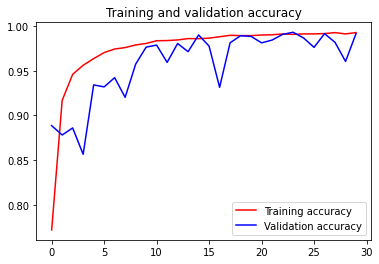

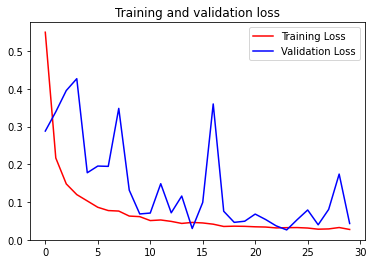

performance given
369/369 [==============================] - 6s 17ms/step

---Now testing the model for one audio file---
The model predicts: de, and ground truth is: de.



In [388]:
plot_performance(history)
print('performance given')

In [398]:
ytest[29]

1

In [400]:
ytest[1000]

0

In [401]:
ytest[10000]

2

In [399]:
#Testing the model on never seen before data.
make_prediction(model, Xtest, ytest, 29)

369/369 [==============================] - 6s 17ms/step

---Now testing the model for one audio file---
The model predicts: en, and ground truth is: en.



In [402]:
#Testing the model on never seen before data.
make_prediction(model, Xtest, ytest, 1000)

369/369 [==============================] - 6s 17ms/step

---Now testing the model for one audio file---
The model predicts: de, and ground truth is: de.



In [403]:
#Testing the model on never seen before data.
make_prediction(model, Xtest, ytest, 10000)

369/369 [==============================] - 7s 18ms/step

---Now testing the model for one audio file---
The model predicts: es, and ground truth is: es.

